In [86]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import os

In [87]:
os.listdir('data')

['trendig_sample',
 '.DS_Store',
 'bkp',
 'Wellington_Region_Tsunami_Evacuation_Zones.csv',
 'TRC_Tsunami_Inundation.csv',
 'int-product-series.xlsx',
 'UNdata_Export.csv',
 'cancer-historical-summary-1948-2015.xlsx',
 'UNdata_sexdeath.csv']

In [88]:
#df=pd.read_excel('data/int-product-series.xlsx',sheet_name='Data base')
df=pd.read_excel('data/int-product-series.xlsx',sheet_name='Total_spend')

In [89]:
df.head()


,Date,Total_Spend
0,2008-04-30,586.858813
1,2008-05-31,423.164530
2,2008-06-30,358.134922
3,2008-07-31,466.636913
4,2008-08-31,518.418619


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         142 non-null    datetime64[ns]
 1   Total_Spend  142 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 KB


In [91]:
df.describe()

,Total_Spend
count,142.000000
mean,735.924479
std,300.928769
min,304.236920
25%,497.301392
50%,687.130047
75%,867.648700
max,1587.910591


In [92]:
#dfr=df[['Date','Spend']]
dfr=df.copy()

In [93]:
dfr.head()

,Date,Total_Spend
0,2008-04-30,586.858813
1,2008-05-31,423.164530
2,2008-06-30,358.134922
3,2008-07-31,466.636913
4,2008-08-31,518.418619


In [94]:
index_dataset=dfr.set_index(['Date'])

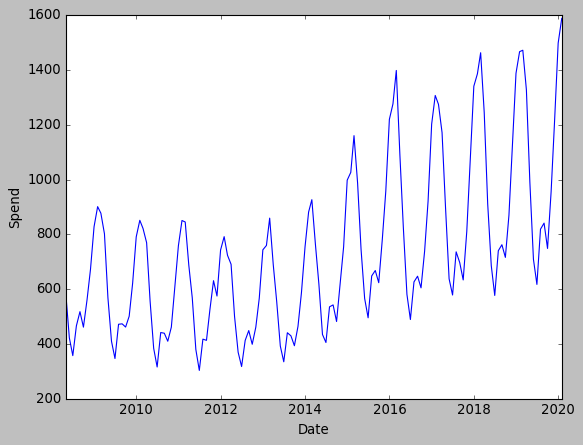

In [95]:
plt.xlabel('Date')
plt.ylabel('Spend')
plt.plot(index_dataset)
plt.show()

In [96]:
#Determining rolling statistics
rolmean=index_dataset.rolling(window=12).mean()
rolstd=index_dataset.rolling(window=12).std()
print(rolmean,rolstd)

            Total_Spend
Date                   
2008-04-30          NaN
2008-05-31          NaN
2008-06-30          NaN
2008-07-31          NaN
2008-08-31          NaN
...                 ...
2019-09-30  1031.066552
2019-10-31  1038.181948
2019-11-30  1045.765728
2019-12-31  1054.945792
2020-01-31  1065.082648

[142 rows x 1 columns]             Total_Spend
Date                   
2008-04-30          NaN
2008-05-31          NaN
2008-06-30          NaN
2008-07-31          NaN
2008-08-31          NaN
...                 ...
2019-09-30   311.742271
2019-10-31   308.701150
2019-11-30   312.081447
2019-12-31   324.421196
2020-01-31   339.969574

[142 rows x 1 columns]


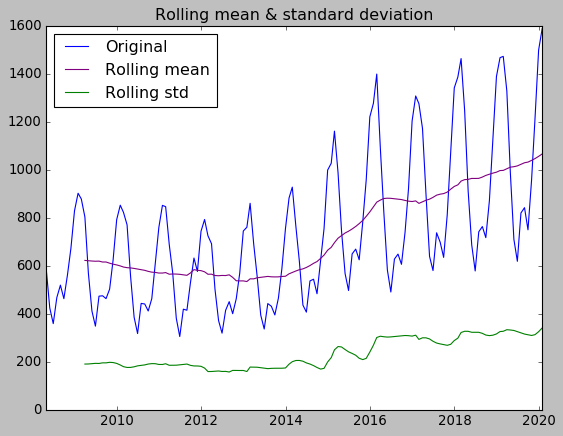

In [97]:
#Plotting rolling statistics
orig=plt.plot(index_dataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='purple',label='Rolling mean')
std=plt.plot(rolstd,color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & standard deviation')
plt.show(block=False)

In [98]:
#perform dicky fuller test
from statsmodels.tsa.stattools import adfuller
print('Results of Dicky fuller test')
dftest=adfuller(index_dataset['Total_Spend'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','#lags used','Number of observation used'])
for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]=value
print(dfoutput)

Results of Dicky fuller test
Test Statistics                 0.266267
p-value                         0.975743
#lags used                     14.000000
Number of observation used    127.000000
Critical value(1%)             -3.482920
Critical value(5%)             -2.884580
Critical value(10%)            -2.579058
dtype: float64


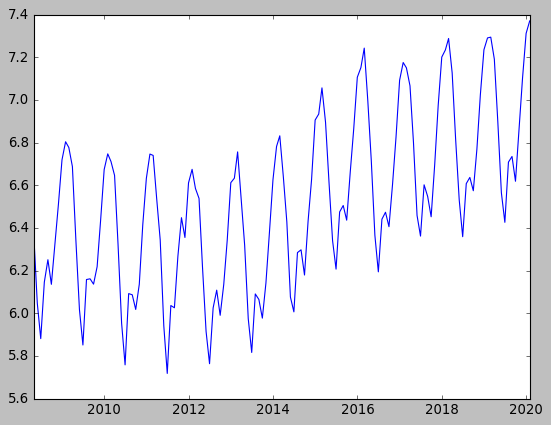

In [99]:
#Estimating trend
import numpy as np
index_dataset_logscale=np.log(index_dataset)
plt.plot(index_dataset_logscale)

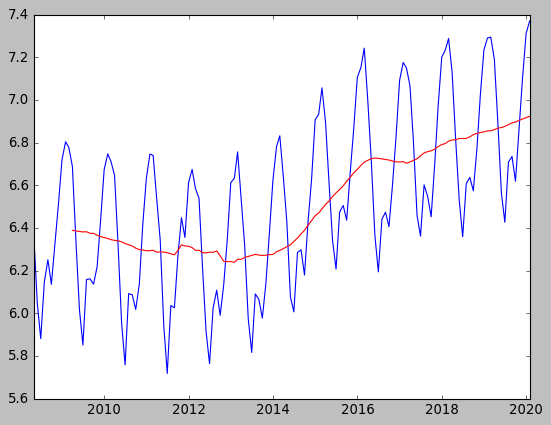

In [100]:
movingAverage=index_dataset_logscale.rolling(window=12).mean()
movingSTD=index_dataset_logscale.rolling(window=12).std()
plt.plot(index_dataset_logscale)
plt.plot(movingAverage,color='red')
plt.show()

In [101]:
datasetLogScaleMinusMovingAverage=index_dataset_logscale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Total_Spend
Date,
2009-03-31,0.298804
2009-04-30,-0.041978
2009-05-31,-0.366418
2009-06-30,-0.529831
2009-07-31,-0.223992
2009-08-31,-0.213175
2009-09-30,-0.238288
2009-10-31,-0.147232
2009-11-30,0.075158


In [102]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeSeries):
    
    #Determining rolling statistics
    movingAverage=timeSeries.rolling(window=12).mean()
    movingStd=timeSeries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig=plt.plot(timeSeries,color='blue',label='Original')
    mean=plt.plot(movingAverage,color='red',label='Rolling mean')
    std=plt.plot(movingStd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & standard deviation')
    plt.show(block=False)
    
    #Perform Dicky-Fuller test
    print('Results of Dicky-Fuller Test')
    dftest=adfuller(timeSeries['Total_Spend'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','Lags used','Number of observation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value %s'%key]=value
    print('\n')
    print(dfoutput)

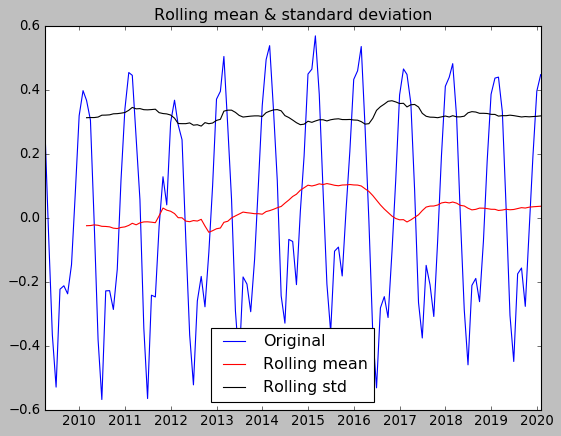

Results of Dicky-Fuller Test


Test Statistics                -1.968087
p-value                         0.300739
Lags used                      13.000000
Number of observation used    117.000000
Critical Value 1%              -3.487517
Critical Value 5%              -2.886578
Critical Value 10%             -2.580124
dtype: float64


In [103]:
test_stationary(datasetLogScaleMinusMovingAverage)

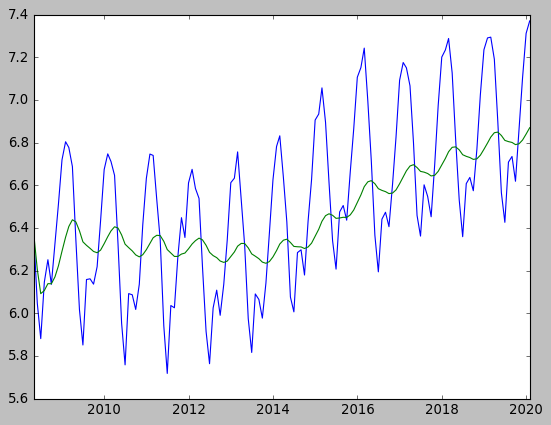

In [113]:
exponentialDecayWeightAverage=index_dataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(index_dataset_logscale)
plt.plot(exponentialDecayWeightAverage)

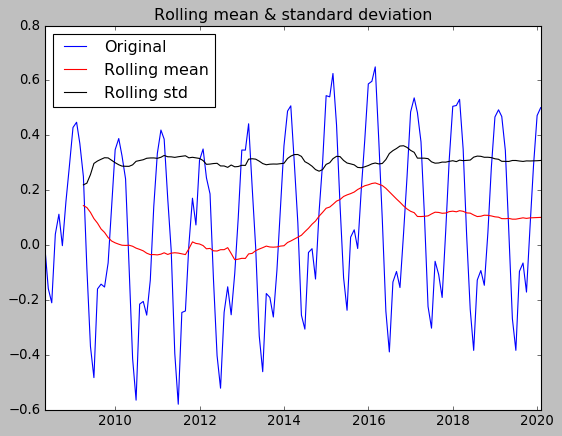

Results of Dicky-Fuller Test


Test Statistics                -1.573076
p-value                         0.497102
Lags used                      14.000000
Number of observation used    127.000000
Critical Value 1%              -3.482920
Critical Value 5%              -2.884580
Critical Value 10%             -2.579058
dtype: float64


In [114]:
datasetLogScaleMinusMovingExponentialDecayAverage=index_dataset_logscale-exponentialDecayWeightAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

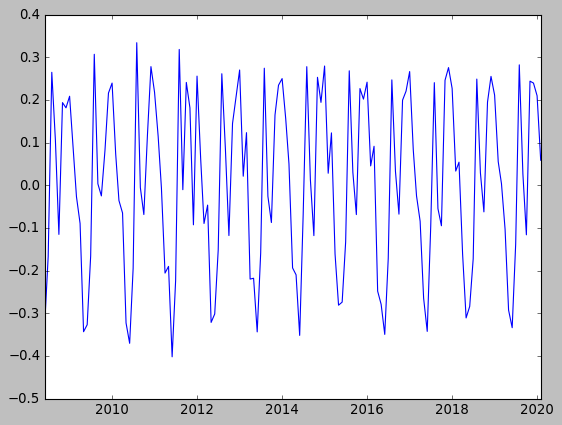

In [115]:
datasetLogDiffShifting=index_dataset_logscale-index_dataset_logscale.shift()
plt.plot(datasetLogDiffShifting)
plt.show()

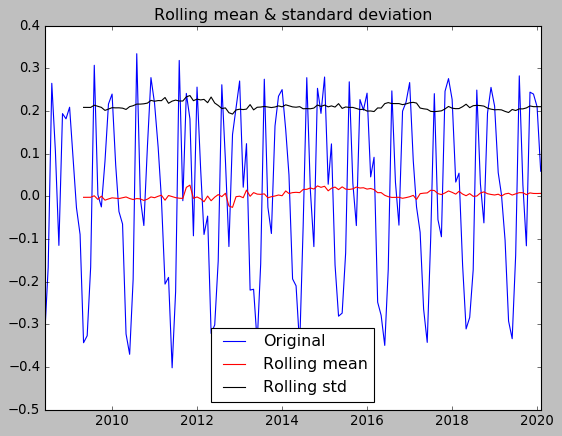

Results of Dicky-Fuller Test


Test Statistics                -2.681051
p-value                         0.077375
Lags used                      13.000000
Number of observation used    127.000000
Critical Value 1%              -3.482920
Critical Value 5%              -2.884580
Critical Value 10%             -2.579058
dtype: float64


In [116]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

In [117]:
decomposition=seasonal_decompose(index_dataset_logscale)
decomposition.seasonal

Date
2008-04-30    0.005928
2008-05-31   -0.332993
2008-06-30   -0.489838
2008-07-31   -0.216155
2008-08-31   -0.211303
                ...   
2019-09-30   -0.262593
2019-10-31   -0.083375
2019-11-30    0.110051
2019-12-31    0.348443
2020-01-31    0.413216
Name: seasonal, Length: 142, dtype: float64

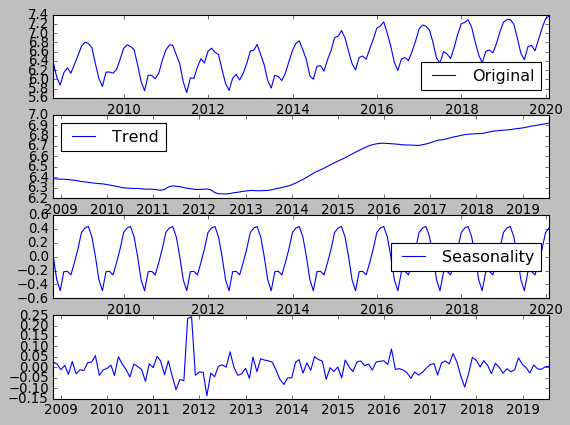

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(index_dataset_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(index_dataset_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.show()



In [146]:
from statsmodels.tsa.stattools import adfuller
def test_stationary_graph(timeSeries):
    
    #Determining rolling statistics
    movingAverage=timeSeries.rolling(window=12).mean()
    movingStd=timeSeries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig=plt.plot(timeSeries,color='blue',label='Original')
    mean=plt.plot(movingAverage,color='red',label='Rolling mean')
    std=plt.plot(movingStd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & standard deviation')
    plt.show(block=False)

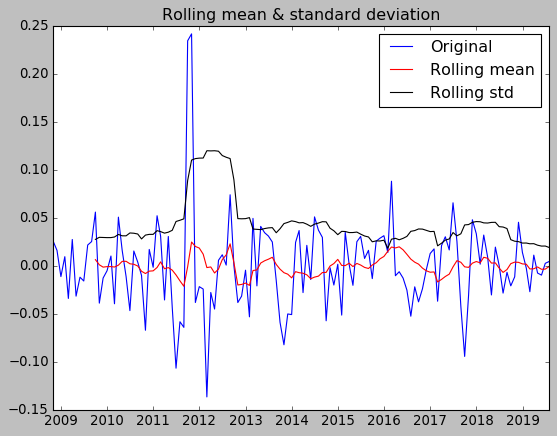

In [147]:
test_stationary_graph(residual)

/Users/rahul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


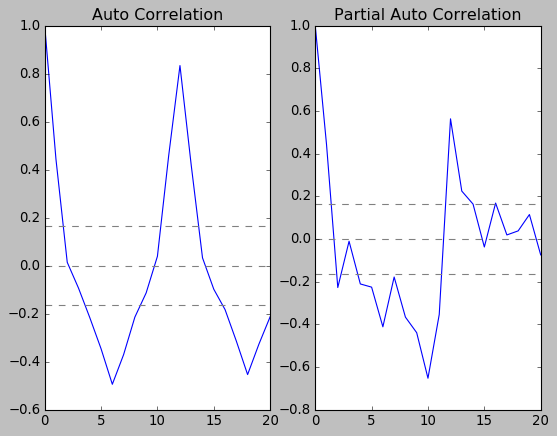

In [152]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20,method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='grey')
plt.title('Auto Correlation')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='grey')
plt.title('Partial Auto Correlation')
plt.show()

#check where the Q value is becoming 0

/Users/rahul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


Plotting AR model


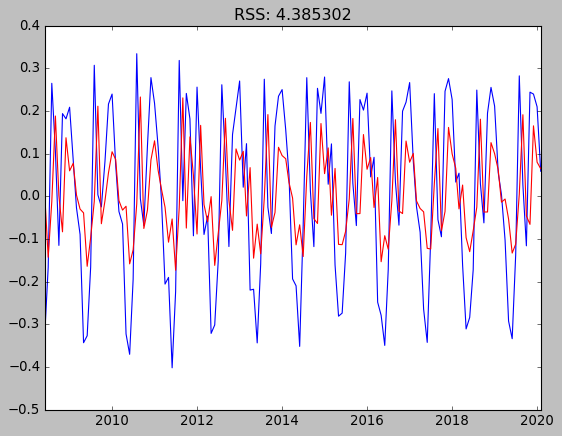

In [157]:
from statsmodels.tsa.arima_model import ARIMA
#AR model
model=ARIMA(index_dataset_logscale,order=(2,1,0)) # change this value for reducing RSS
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:% 4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting['Total_Spend'])**2))
print('Plotting AR model')

In [158]:
prediction_ARIMA_DIFF=pd.Series(results_AR.fittedvalues,copy=True)
print(prediction_ARIMA_DIFF)

Date
2008-05-31    0.006046
2008-06-30   -0.143001
2008-07-31   -0.012657
2008-08-31    0.187988
2008-09-30    0.001283
                ...   
2019-09-30   -0.045972
2019-10-31   -0.065956
2019-11-30    0.164975
2019-12-31    0.079851
2020-01-31    0.064542
Length: 141, dtype: float64


In [159]:
#Convert to cumulative sum
prediction_ARIMA_diff_cumsum=prediction_ARIMA_DIFF.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Date
2008-05-31    0.006046
2008-06-30   -0.136955
2008-07-31   -0.149612
2008-08-31    0.038375
2008-09-30    0.039659
dtype: float64


In [165]:
#prediction_ARIMA_LOG=pd.Series(index_dataset_logscale['Total_Spend'].ix[0],index=index_dataset_logscale.index)
prediction_ARIMA_LOG=pd.Series(index_dataset_logscale['Total_Spend'],index=index_dataset_logscale.index)

prediction_ARIMA_LOG=prediction_ARIMA_LOG.add(prediction_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA_LOG.head()

Date
2008-04-30    6.374784
2008-05-31    6.053807
2008-06-30    5.743955
2008-07-31    5.995939
2008-08-31    6.289159
dtype: float64

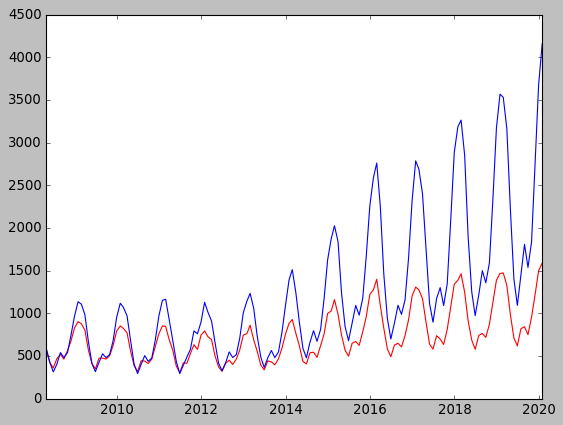

In [167]:
predictions_ARIMA=np.exp(prediction_ARIMA_LOG)
plt.plot(index_dataset,color='red')
plt.plot(predictions_ARIMA)

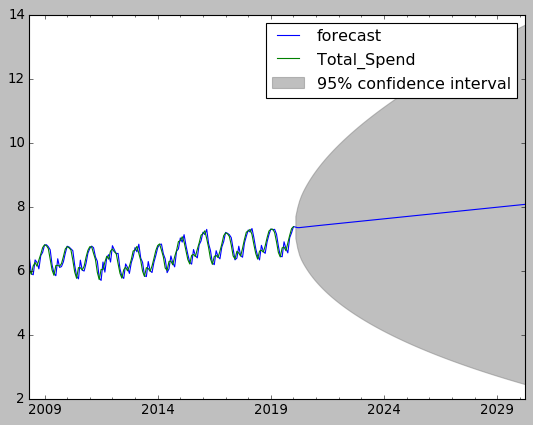

In [169]:
#forecast
results_AR.plot_predict(1,264)
x=results_AR.forecast(steps=120)